# Some fundamentals first

## Basics

### matplotlib vs matplotlib.pyplot

matplotlib is the main package which supports control of the plot to very low level.
matplotlib.pyplot is a module which is at the top of the hierarchy and provides a "state-machine-like environment", with similar experience as Matlab. Pyplot basically exposes the functionality of 'pure' matplotlib and makes it easier to use.

Next in the hierarchy are several objects. Pyplot is used mostly only to create these objects.

Pyplot can be ditched completely for usage in some web frameworks etc., where performance is more important. Pyplot is memory heavy (keeps reference to last Figures and Axes) and can memory-leak (if Figures not shown). We will not deal with this.

## Objects hierarchy

### Canvas
Too low level. Mostly invisible for the user.

### Figure
The basic object which takes care of 'Axes'. Figure can have any number of Axes.

### Axes
This is basically the plot itself. One object of Axes can belong only to one Figure. Axes hold two (or three in 3D) objects of class Axis.
Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

### Axis
The collection of objects taking care of limits, ticks, tickslabels etc. The positions of these objects are determined by objects Locator and Formatter.

### Artist
Basically anything you can see in the figure is an Artist (lines, text, etc.).  During render, all Artists are plotted to Canvas.

Source: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

### Knowing the basics, we can understand better what happends in these simple examples.

In [122]:
import matplotlib.pyplot as plt
import numpy as np

data = np.linspace(0,10,100)

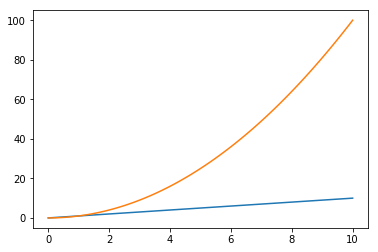

In [123]:
plt.plot(data, data)     # creates Axes object, pyplot keeps reference to 'current Axes'
plt.plot(data, data**2)  # adds to the 'current' Axes object (it's a state machine, remember?)
plt.show();              # show() is called for 'current Axes'

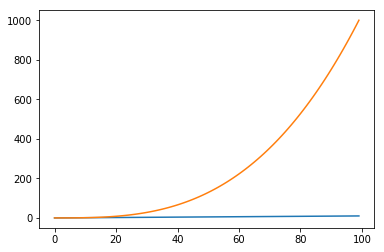

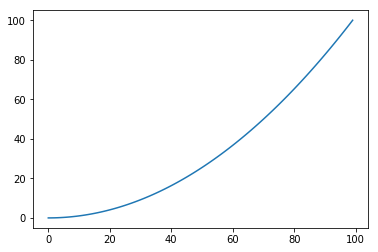

In [125]:
# to control more figures
plt.figure(1)
plt.plot(data)      # 'current Axes' is Axes of figure(1)

plt.figure(2)
plt.plot(data**2)   # 'current Axes' is Axes of figure(2)

# what if at this point, I want to add something to figure(1) ??
plt.figure(1)       # switch back to fig 1
plt.plot(data**3);  # 'current Axes' is Axes of figure(1)

### Let's get into more details on creating and controlling Figure and Axes.

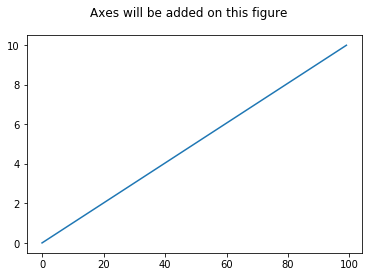

In [126]:
fig = plt.figure()                      # an empty Figure with no Axes
fig.suptitle('Axes will be added on this figure')  # Add a title so we know which it is
# plt.show()                            # this will do nothing because there are no Axes

# how to add Axes into this Figure fig
axes = fig.gca() # Get Current Axes
axes.plot(data);

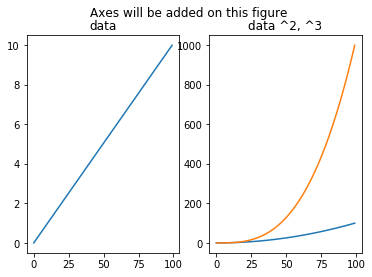

In [101]:
fig = plt.figure()                      # an empty Figure with no Axes
fig.suptitle('Axes will be added')      # Add a title so we know which it is
# plt.show()                            # this will do nothing because there are no Axes

# how to add more Axes into this Figure
axes1 = fig.add_subplot(121) # 1 row, 2 cols, 1st plot
axes1.plot(data)
axes1.set_title("data")
axes2 = fig.add_subplot(122) # 1 row, 2 cols, 2nd plot
axes2.plot(data**2)
axes2.plot(data**3)
axes2.set_title("data ^2, ^3");

We can create them at once:

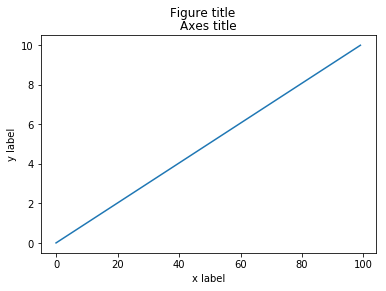

In [102]:
fig, ax = plt.subplots()  # creates Figure and Axes which is already in the Figure
fig.suptitle("Figure title")
ax.plot(data)
ax.set_title("Axes title")
ax.set_xlabel("x label")  # labels
ax.set_ylabel("y label") ;

### How to manage more subplots at once?

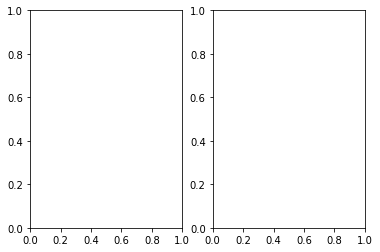

In [93]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
# use ax1 and ax2 as before for plot() etc.

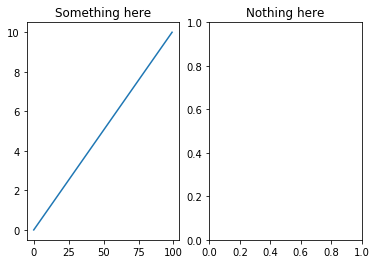

In [108]:
fig, ax = plt.subplots(ncols=2)
# use ax[0], ax[1] as before
ax[0].plot(data)
ax[0].set_title("Something here")
ax[1].set_title("Nothing here");

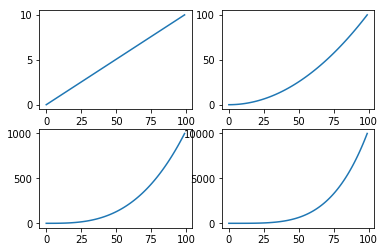

In [104]:
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0,0].plot(data)
ax[0,1].plot(data**2)
ax[1,0].plot(data**3)
ax[1,1].plot(data**4);

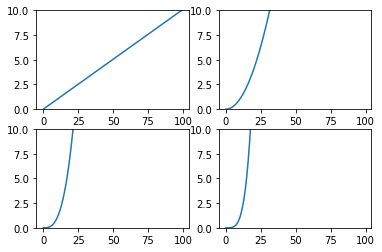

In [129]:
# to set the same y-axis
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0,0].plot(data)
ax[0,0].set_ylim(0,10)

ax[0,1].plot(data**2)
ax[0,1].set_ylim(0,10)

ax[1,0].plot(data**3)
ax[1,0].set_ylim(0,10)

ax[1,1].plot(data**4);
ax[1,1].set_ylim(0,10);

### Often we want a function that plots some data into figure, how to achieve this?
The best practise is to put Axes into argument of the function.

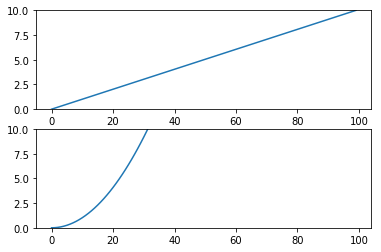

In [134]:
def plot_my_data(axes, data):
    axes.plot(data)
    axes.set_ylim(0,10)
    # etc.

fig, ax = plt.subplots(nrows=2)
plot_my_data(ax[0], data)
plot_my_data(ax[1], data**2)